#  텍스트 데이터 전처리

 용도에 맞게 텍스트를 사전에 처리하는 작업
 -코퍼스 데이터를 용도에 맞게 토큰화,정제,정규화 함
 
 코퍼스: 말뭉치 or 말모둠 (언어 데이터를 모아둔 집합)
 

# 토큰화 

주어진 코퍼스에서 토큰 다위로 나누는 작업
1)텍스트에 대한 정보를 의미있는 단위별로 구분
2)NLTK,KoNLPY 라이브러리 이용


# 토큰화에서 고려 상항

1. 구두점이나 특수 문자를 단순 제외해서는 안됨
 -구두점조차 하나의 토큰으로 분류하기도 함
 
2.줄임말과 단언 내에 띄어쓰기가 있는 경우

# 한국어 톤큰화
 한국어 토큰화에서는 형태소(morpheme)란 개념을 반드시 이해해야 합니다. 형태소(morpheme)란 뜻을 가진 가장 작은 말의 단위를 말합니다. 이 형태소에는 두 가지 형태소가 있는데 자립 형태소와 의존 형태소입니다.

자립 형태소 : 접사, 어미, 조사와 상관없이 자립하여 사용할 수 있는 형태소. 그 자체로 단어가 된다. 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등이 있다.
의존 형태소 : 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간를 말한다.

예를 들어 다음과 같은 문장이 있다고 합시다.

문장 : 에디가 딥러닝책을 읽었다
이를 형태소 단위로 분해하면 다음과 같습니다.

자립 형태소 : 에디, 딥러닝책
의존 형태소 : -가, -을, 읽-, -었, -다

이를 통해 유추할 수 있는 것은 한국어에서 영어에서의 단어 토큰화와 유사한 형태를 얻으려면 어절 토큰화가 아니라 형태소 토큰화를 수행해야한다는 겁니다.

# NLTK의 word_tokenize 사용 

In [6]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

print(word_tokenize("Don't be fooled by the dark sounding name, Mr.Jong's Orphanage is as cheery as cheery goes for a pastry shop."))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.Jong', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


nltk의 WordPunctTokenizer 사용

In [5]:
import nltk
from nltk.tokenize import WordPunctTokenizer
WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr.Jong's Orphanage is as cheery as cheery goes for a pastry shop.")

['Don',
 "'",
 't',
 'be',
 'fooled',
 'by',
 'the',
 'dark',
 'sounding',
 'name',
 ',',
 'Mr',
 '.',
 'Jong',
 "'",
 's',
 'Orphanage',
 'is',
 'as',
 'cheery',
 'as',
 'cheery',
 'goes',
 'for',
 'a',
 'pastry',
 'shop',
 '.']

# 표준 토큰화 예제

In [9]:
#규칙1. 하이픈으로 구성된 단어는 하나로 유지
#    2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어 분리
import nltk
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()

text="Starting a home-based restaurant may be an ideal. It doesn't have a food chain or restaurant of their own."
tokenizer.tokenize(text)

['Starting',
 'a',
 'home-based',
 'restaurant',
 'may',
 'be',
 'an',
 'ideal.',
 'It',
 'does',
 "n't",
 'have',
 'a',
 'food',
 'chain',
 'or',
 'restaurant',
 'of',
 'their',
 'own',
 '.']

# NLTK를 이용한 영어 토큰화
-NLTK에서는 영어 코퍼스에 품사 태깅 기능을 지원
-NLTK에서는 Penn Treebank POS Tags라는 기준을 사용

In [11]:
#토큰화 수행
import nltk
from nltk.tokenize import word_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


In [13]:
#품사태깅
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

x=word_tokenize(text)
pos_tag(x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미

# okt 분석기 사용

In [1]:
from konlpy.tag import Okt

okt=Okt()

print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) #형태소 추출

C:\Users\Affinity\.conda\envs\keras\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [4]:
#품사태깅
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

print("-----------------------------------")
#명사 추출
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
-----------------------------------
['코딩', '당신', '연휴', '여행']


# 한나눔 분석기 사용예제 

In [5]:
from konlpy.tag import Hannanum           #한나눔 모듈 불러오기
han=Hannanum()

print(han.nouns('형태소 분석을 해봅시다. 어렵지않아요'))   #명사 분석

['형태소', '분석']


In [7]:
print(han.morphs('형태소 분석을 해봅시다. 어렵지않아요'))   #형태소 분석

print("--------------------------")
print(han.pos('형태소 분석을 해봅시다. 어렵지않아요'))      #품사분석, 형태소와 품사로 이루어진                                                                튜플 리스트

['형태소', '분석', '을', '하', '어', '보', 'ㅂ시다', '.', '어렵', '지', '않', '아요']
--------------------------
[('형태소', 'N'), ('분석', 'N'), ('을', 'J'), ('하', 'P'), ('어', 'E'), ('보', 'P'), ('ㅂ시다', 'E'), ('.', 'S'), ('어렵', 'P'), ('지', 'E'), ('않', 'P'), ('아요', 'E')]


 E	어미	EC	연결 어미	EC	연결 어미	EC	연결 어미	Adjective	형용사
1	EC	연결 어미	ECD	의존적 연결 어미	EF	종결 어미	EF	종결 어미	Adverb	부사
2	EF	종결 어미	ECE	대등 연결 어미	EP	선어말어미	EP	선어말어미	Alpha	알파벳
3	EP	선어말어미	ECS	보조적 연결 어미	ETM	관형형 전성 어미	ETM	관형형 전성 어미	Conjunction	접속사
4	ET	전성 어미	EF	종결 어미	ETN	명사형 전성 어미	ETN	명사형 전성 어미	Determiner	관형사
5	F	외국어	EFA	청유형 종결 어미	IC	감탄사	IC	감탄사	Eomi	어미
6	I	독립언	EFI	감탄형 종결 어미	JC	접속 조사	JC	접속 조사	Exclamation	감탄사
7	II	감탄사	EFN	평서형 종결 어미	JKB	부사격 조사	JKB	부사격 조사	Foreign	외국어, 한자 및 기타기호
8	J	관계언	EFO	명령형 종결 어미	JKC	보격 조사	JKC	보격 조사	Hashtag	트위터 해쉬태그
9	JC	격조사	EFQ	의문형 종결 어미	JKG	관형격 조사	JKG	관형격 조사	Josa	조사
10	JP	서술격 조사	EFR	존칭형 종결 어미	JKO	목적격 조사	JKO	목적격 조사	KoreanParticle	(ex: ㅋㅋ)
11	JX	보조사	EP	선어말 어미	JKQ	인용격 조사	JKQ	인용격 조사	Noun	명사
12	M	수식언	EPH	존칭 선어말 어미	JKS	주격 조사	JKS	주격 조사	Number	숫자
13	MA	부사	EPP	공손 선어말 어미	JKV	호격 조사	JKV	호격 조사	PreEomi	선어말어미
14	MM	관형사	EPT	시제 선어말 어미	JX	보조사	JX	보조사	Punctuation	구두점
15	N	체언	ET	전성 어미	MAG	일반 부사	MAG	일반 부사	ScreenName	트위터 아이디
16	NB	의존명사	ETD	관형형 전성 어미	MAJ	접속 부사	MAJ	접속 부사	Suffix	접미사
17	NC	보통명사	ETN	명사형 전성 어미	MM	관형사	MM	관형사	Unknown	미등록어
18	NN	수사	IC	감탄사	NA	분석불능범주	NNB	의존 명사	Verb	동사
19	NP	대명사	JC	접속 조사	NF	명사추정범주	NNBC	단위를 나타내는 명사	*	*
20	NQ	고유명사	JK	조사	NNB	의존 명사	NNG	일반 명사	*	*
21	P	용언	JKC	보격 조사	NNG	일반 명사	NNP	고유 명사	*	*
22	PA	형용사	JKG	관형격 조사	NNP	고유 명사	NP	대명사	*	*
23	PV	동사	JKI	호격 조사	NP	대명사	NR	수사	*	*
24	PX	보조 용언	JKM	부사격 조사	NR	수사	SC	구분자 , · / :	*	*
25	S	기호	JKO	목적격 조사	NV	용언추정범주	SE	줄임표 …	*	*
26	X	접사	JKQ	인용격 조사	SE	줄임표	SF	마침표, 물음표, 느낌표	*	*
27	XP	접두사	JKS	주격 조사	SF	마침표, 물음표, 느낌표	SH	한자	*	*
28	XS	접미사

# 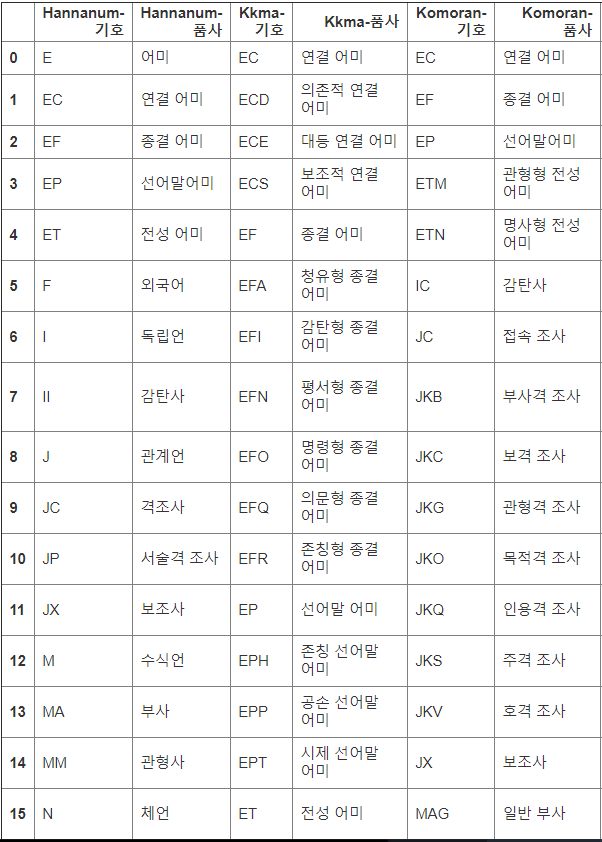
https://datascienceschool.net/view-notebook/70ce46db4ced4a999c6ec349df0f4eb0/

In [9]:
from konlpy.tag import Hannanum

han=Hannanum()
text=input("분석할 텍스트를 입력하세요.: ")
result=han.pos(text)                    #result 는 (형태소, 품사) 형태로 나타남

for lex,pos in result:
    print("{} \t {}".format(lex,pos))           # \t : tab

분석할 텍스트를 입력하세요.: 당신은 누구입니까?
당신 	 N
은 	 J
누구 	 N
이 	 J
ㅂ니까 	 E
? 	 S


#okt 분석기 예제 

In [10]:
from konlpy.tag import Okt

okt=Okt()
text=input("분석할 텍스트를 입력하세요.: ")
result=okt.pos(text)                    #result 는 (형태소, 품사) 형태로 나타남

for lex,pos in result:
    print("{} \t {}".format(lex,pos))           # \t : tab

분석할 텍스트를 입력하세요.: 너는 누구냐?
너 	 Noun
는 	 Josa
누구 	 Noun
냐 	 Josa
? 	 Punctuation


Corpus 이용 

In [16]:
from konlpy.corpus import kolaw
from konlpy.tag import Okt

okt=Okt

law_corpus = kolaw.open('constitution.txt').read()
law_corpus[:50]



'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임'

In [18]:
okt.pos(law_corpus[:50])

TypeError: pos() missing 1 required positional argument: 'phrase'

# 정제
-토큰화 작업에 방해가 되는 부분들을 배제
*동일한 표현의 표기가 다른 단어들 통합

*대,소문자 통합(무작정 통합은 금물)

*불필요한 단어 제거 
-문장분석하는데 큰 도움이 되지 않은 단어 제거
-등장 빈도가 적은 단어
-길이가 짧은 단어

불용어 확인 

In [22]:

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
  

stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Affinity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

불용어 제거


In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example="Family is not an important thing. It's everything"    #임의의 문장 정의
stop_words=set(stopwords.words('english'))         #nltkrk wjddmlgkrh dlTsms qnfdyddjfmf wpdhlgks rufrhk cnffur

word_tokens=word_tokenize(example)
reslut=[]

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens)
print(result)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything']
[('너', 'Noun'), ('는', 'Josa'), ('누구', 'Noun'), ('냐', 'Josa'), ('?', 'Punctuation'), 'Family', 'important', 'thing', '.', 'It', "'s", 'everything']


한국어 적용 

In [33]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example= "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."

stop_words="아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"

stop_words=stop_words.split(' ')
word_tokens= word_tokenize(example)
result=[]

for w in word_tokens:
    if w not in stop_words:
        result.append(w)
        
print(word_tokens)
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


# 불용어 제거 실습(한국어)
고등교육법 관련 법안 분석

In [34]:
import nltk
from konlpy .corpus import kobill        #kobill:konlpy 에 내장되어 있는 법률안 읽어오는 함수

files_ko=kobill.fileids()           #kobill에는 team POPNG에의해 취합된 의회정보들이 존재

files_ko

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [36]:
doc_ko=kobill.open('1809894.txt').read()              #문서 중 하나 선택하여 열기
doc_ko

'고등교육법 일부개정법률안\n\n(안상수의원 대표발의 )\n\n 의 안\n 번 호\n\n9894\n\n발의연월일 : 2010.  11.  15.\n\n발  의  자 : 안상수․김정훈․원희목 \n\n강석호․서상기․나성린 \n\n권영진․이춘식․정영희 \n\n이애주․안형환․백성운 \n\n김금래 의원(13인)\n\n제안이유 및 주요내용\n\n  현재 간호사의 경우 전문대학 졸업 또는 대학 졸업에 상관없이 면\n\n허증을 취득할 수 있지만, 학위의 종류가 전문학사이기 때문에 학사학\n\n위를 취득하기 위하여 87.2%가 별도로 학사학위 교육과정을 이수하고 \n\n있는 실정임.\n\n  이러한 4년제 간호 교육의 필요성과 선진 각국의 경향을 고려하고 \n\n국민에 대한 보다 나은 의료 서비스를 제공하기 위하여 대통령령이 \n\n정하는 일정한 기준을 충족하는 간호과에 대해서는 수업연한을 4년으\n\n로 하고, 수여하는 학위의 종류를 학사학위로 하도록 함(안 제50조의3 \n\n신설).\n\n- 1 -\n\n\x0c법률  제        호\n\n고등교육법 일부개정법률안\n\n고등교육법 일부를 다음과 같이 개정한다.\n\n제50조의3을 다음과 같이 신설한다.\n\n제50조의3(간호과의 수업연한 및 학위에 관한 특례) ① 대통령령이 정\n\n하는 기준을 충족하는 간호과의 수업연한은 4년으로 한다.\n\n  ② 제1항의 간호과에서 학칙이 정하는 과정을 이수한 자에 대하여\n\n는 학사학위를 수여한다.\n\n  ③ 제2항의 학위의 종류 및 수여에 관하여 필요한 사항은 대통령령\n\n으로 정한다.\n\n부      칙\n\n① 이 법은 공포 후 6개월이 경과한 날부터 시행한다.\n\n② 이 법 시행 당시 수업연한이 4년으로 된 간호과에 재학 중인 자에 \n\n대해서는 본인의 신청에 의하여 종전의 수업연한 및 학위에 관한 규\n\n정을 적용할 수 있다.\n\n- 3 -\n\n\x0c신·구조문대비표\n\n현      행\n\n개   정   안\n\n  <신  설>\n\n제50조의3(간

In [37]:
from konlpy.tag import Okt             #okt 형태소 분석기 호출

okt=Okt()

nouns=okt.nouns(doc_ko)   #명사 분석
nouns 

['고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '안상수',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '안상수',
 '김정훈',
 '원희목',
 '강석호',
 '서상기',
 '나성린',
 '권영진',
 '이춘식',
 '정영희',
 '이애주',
 '안형환',
 '백성운',
 '김금래',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '현재',
 '간호사',
 '경우',
 '전문',
 '대학',
 '졸업',
 '대학',
 '졸업',
 '면',
 '증',
 '취득',
 '수',
 '학위',
 '종류',
 '문학사',
 '이기',
 '때문',
 '학',
 '사학',
 '위',
 '취득',
 '위',
 '별도',
 '학사',
 '학위',
 '교육과정',
 '이수',
 '실정',
 '임',
 '간호',
 '교육',
 '필요성',
 '선진',
 '각국',
 '경향',
 '고려',
 '국민',
 '대한',
 '나은',
 '의료',
 '서비스',
 '제공',
 '위',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '과',
 '대해',
 '수업',
 '연한',
 '로',
 '수여',
 '학위',
 '종류',
 '학사',
 '학위',
 '함',
 '안',
 '제',
 '신설',
 '법률',
 '제',
 '호',
 '고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안',
 '고등',
 '교육법',
 '일부',
 '다음',
 '개정',
 '제',
 '다음',
 '신설',
 '제',
 '간호',
 '수업',
 '연한',
 '및',
 '학위',
 '관',
 '특례',
 '대통령령',
 '정',
 '기준',
 '충족',
 '간호',
 '수업',
 '연한',
 '제',
 '항의',
 '간호',
 '과',
 '학칙',
 '정',
 '과정',
 '이수',
 '자',
 '대하',
 '학사',
 '학위',


In [38]:
ko=nltk.Text(nouns,name='의안 제1809894호')   #문서를 탐색

print(len(ko.tokens))    #수집된 단어의 횟수
print(len(set(ko.tokens)))        #수집된 단어의 고유한 횟수

ko.vocab()            #단어별 빈도

240
121


FreqDist({'학위': 11, '간호': 9, '정': 9, '제': 9, '수업': 7, '연한': 7, '및': 6, '안': 5, '관': 5, '자': 4, ...})

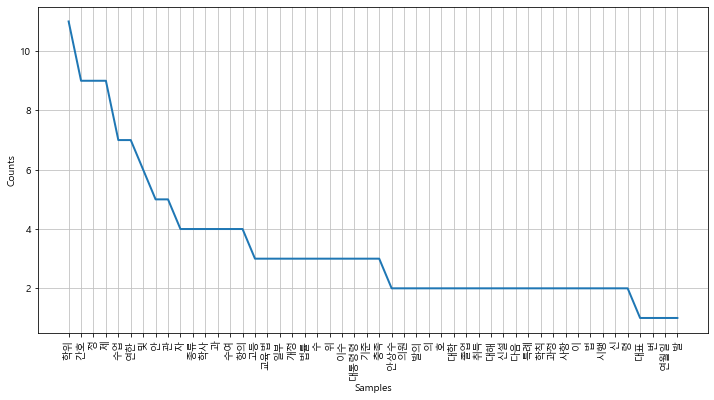

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path= 'c:/windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name= font_manager.FontProperties(fname=path).get_name()
rc('font', family= font_name)

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [44]:
from wordcloud import WordCloud, STOPWORDS

stopwords=['정','제','및','안','자','과','수','의','이','발']
ko=[each_word for each_word in ko if each_word not in stopwords]

ko

['고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '안상수',
 '의원',
 '대표',
 '발의',
 '번',
 '호',
 '발의',
 '연월일',
 '안상수',
 '김정훈',
 '원희목',
 '강석호',
 '서상기',
 '나성린',
 '권영진',
 '이춘식',
 '정영희',
 '이애주',
 '안형환',
 '백성운',
 '김금래',
 '의원',
 '인',
 '제안',
 '이유',
 '내용',
 '현재',
 '간호사',
 '경우',
 '전문',
 '대학',
 '졸업',
 '대학',
 '졸업',
 '면',
 '증',
 '취득',
 '학위',
 '종류',
 '문학사',
 '이기',
 '때문',
 '학',
 '사학',
 '위',
 '취득',
 '위',
 '별도',
 '학사',
 '학위',
 '교육과정',
 '이수',
 '실정',
 '임',
 '간호',
 '교육',
 '필요성',
 '선진',
 '각국',
 '경향',
 '고려',
 '국민',
 '대한',
 '나은',
 '의료',
 '서비스',
 '제공',
 '위',
 '대통령령',
 '기준',
 '충족',
 '간호',
 '대해',
 '수업',
 '연한',
 '로',
 '수여',
 '학위',
 '종류',
 '학사',
 '학위',
 '함',
 '신설',
 '법률',
 '호',
 '고등',
 '교육법',
 '일부',
 '개정',
 '법률',
 '고등',
 '교육법',
 '일부',
 '다음',
 '개정',
 '다음',
 '신설',
 '간호',
 '수업',
 '연한',
 '학위',
 '관',
 '특례',
 '대통령령',
 '기준',
 '충족',
 '간호',
 '수업',
 '연한',
 '항의',
 '간호',
 '학칙',
 '과정',
 '이수',
 '대하',
 '학사',
 '학위',
 '수여',
 '항의',
 '학위',
 '종류',
 '수여',
 '관',
 '사항',
 '대통령령',
 '부',
 '칙',
 '법',
 '공포',
 '후',
 '개월',
 '경과',
 '날',
 '시행',
 '법',
 '시행',
 '당시

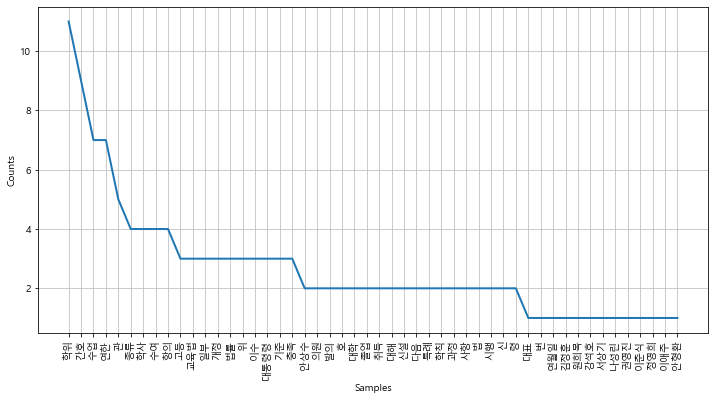

In [45]:
ko=nltk.Text(ko,name='의안 제1809894호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

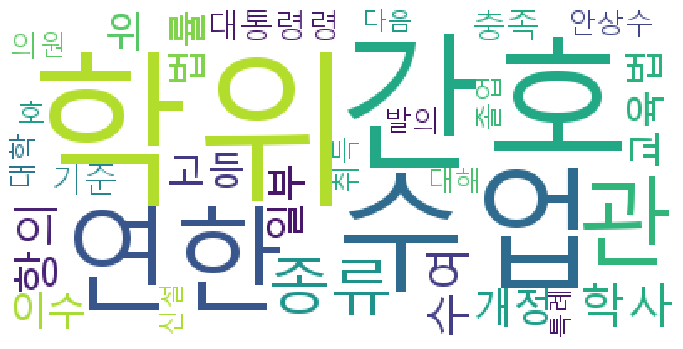

In [49]:
data=ko.vocab().most_common(30)   #최빈도 단어 30개를 사용

wordcloud=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,18))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 정규표현식 

In [1]:
import re

r=re.compile("a.c")
r.search('kkk')         #아무 결과 출력 되지 않음

In [3]:
r.search("abc")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [4]:
import re 
r=re.compile("ab?c")
r.search("abbc")#    아무 결과 출력 x



In [6]:
r.search("abc")

r.search("ac")

<_sre.SRE_Match object; span=(0, 2), match='ac'>

+사용

In [9]:
import re
r=re.compile("ab*c")
r.search("a")             #아무 결과 출력 x       
r.search("ac")

<_sre.SRE_Match object; span=(0, 2), match='ac'>

In [11]:
r.search("abc")

<_sre.SRE_Match object; span=(0, 3), match='abc'>

^사용 

In [12]:
import re
r=re.compile("^a")
r.search("bbc")

In [13]:
r.search("ab")

<_sre.SRE_Match object; span=(0, 1), match='a'>

{숫자} 사용 

In [14]:
import re
r=re.compile("ab{2}c")
r.search("ac")

In [16]:
r.search("abbc")

<_sre.SRE_Match object; span=(0, 4), match='abbc'>

{숫자1, 숫자2} 기호 

In [17]:
import re
r=re.compile("ab{2,8}c")
r.search("abc")

In [19]:
r.search('abbbbbc')

<_sre.SRE_Match object; span=(0, 7), match='abbbbbc'>

{숫자,} 

In [20]:
import re
r=re.compile("ab{2,}bc")
r.search("abc")

In [24]:
r.search("abbbc")

<_sre.SRE_Match object; span=(0, 5), match='abbbc'>

   [ ]  

In [27]:
import re
r=re.compile("[abc]")
r.search("zzz")

In [28]:
r.search('aaa')

<_sre.SRE_Match object; span=(0, 1), match='a'>

In [30]:
r.search('1a2b')

<_sre.SRE_Match object; span=(1, 2), match='a'>

# [^문자]

In [31]:
import re
r=re.compile("[^abc]")
r.search("abc")

In [33]:
r.search('d')

<_sre.SRE_Match object; span=(0, 1), match='d'>

#  정규 표현식, 모듈 함수

split() 

In [37]:
import re
text="""사과
딸기
수박
메론
바나나"""

re.split("\n",text)

['사과', '딸기', '수박', '메론', '바나나']

In [35]:
import re
text="""사과+딸기+수박+메론+바나나"""

re.split("\+",text)

['사과', '딸기', '수박', '메론', '바나나']

re.findall() 

In [38]:
import re
text="""이름: 김철수
전화번호:010-1234-1234
나이: 30
성별: 남"""

re.findall("\d+",text)

['010', '1234', '1234', '30']

re.sub()

In [39]:
import re
text="Regular Expression : A regular expression, regex or regexp[1] (sometimes called a rational expression) [2][3] is, in theoretical computer science and formal language theory, a sequence of character s that define a search pattern."


re.sub('[^a-zA-z]',' ',text)

'Regular Expression   A regular expression  regex or regexp[ ]  sometimes called a rational expression  [ ][ ] is  in theoretical computer science and formal language theory  a sequence of character s that define a search pattern '

In [40]:
#정규 표현식으로 불필요한 단어 제거

import re
text="I was wondering if anyone out there could enlighten me on this car."
shortword=re.compile(r'\\*\b\w{1,2}\b')

print(shortword.sub('',text))
                    

 was wondering  anyone out there could enlighten   this car.


#  연습하기

1.konlpy의 법률안 중 하나를 이용해 형태소 분석을하고 (명사 추출, 형태소 추출, 품사 태깅 등)
정제 한후, 가장 많이 나오는 30개 단어를 이용해 시각화 하여 분석해보자.

In [42]:
import nltk
from konlpy.corpus import kobill               #kobill: konlpy 에 내장되어 있는 법률안 읽기

files_ko=kobill.fileids()

files_ko

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [48]:
doc_kk=kobill.open('1809892.txt').read()
doc_kk

'교육공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9892\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  현행 교육공무원의 육아휴직은 만 6세 이하의 초등학교 취학 전 자\n\n녀의 육아를 위한 경우로 한정되어 있어 초등학교 취학 후 등하교 및 \n\n방과 후 양육 등에 어려움이 많고, 저학년 자녀 혼자 등하교를 하거나 \n\n어른 없는 집에서 지내다가 성폭력 범죄 등 흉악범죄의 피해자가 되\n\n고 있음. \n\n  이에 육아휴직 가능 시기를 만 8세 이하의 자녀로 확대하여 자녀가 \n\n초등학교에 입학하여 학교생활에 순조롭게 적응할 수 있는 나이까지 \n\n교육공무원이 자녀양육을 위해서 휴직할 수 있도록 하려는 것임(안 제\n\n44조제1항제7호). \n\n- 1 -\n\n\x0c법률  제        호\n\n교육공무원법 일부개정법률안\n\n교육공무원법 일부를 다음과 같이 개정한다.\n\n제44조제1항제7호 중 “자녀(만 6세 이하의 초등학교 취학 전 자녀)”를 \n\n“만 8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자\n\n녀”로 한다.\n\n제45조제1항제6호 중 “1년 이내로 한다. 다만, 여자 교육공무원의 경\n\n우 任用權者는 2年의 범위내에서 그 休職期間을 연장할 수 있다.”를 \n\n“1년 이내(여자 교육공무원 3년 이내)로 하되, 분할하여 휴직할 수 있\n\n다.”로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n第44條(休職) ① 敎育公務員이 다\n\n第44條(休職) ① ---------------\n\n음 각 호의 어느 하나에 해당\n\n----------------------------\n\n하

In [49]:
from konlpy.tag import Okt            #Okt 형태소 분ㄴ석기 호출

okt=Okt()

nouns=okt.nouns(doc_kk)  #명사 추출
morphs=okt.morphs(doc_kk)  #형태소 추출
pos=okt.pos(doc_kk)          #품사 태깅


print(nouns)

print("------")
print(doc_kk)

['교육', '공무원', '법', '일부', '개정', '법률', '안', '정의화', '의원', '대표', '발의', '의', '안', '번', '호', '발의', '연월일', '발', '의', '자', '정의화', '이명수', '김을동', '이사철', '여상규', '안규백', '황영철', '박영아', '김정훈', '김학송', '의원', '인', '제안', '이유', '및', '내용', '현행', '교육', '공무원', '육아휴직', '만', '세', '이하', '초등학교', '취학', '전', '자', '녀', '육아', '위', '경우', '한정', '초등학교', '취학', '후', '등하교', '및', '방과', '후', '양육', '등', '어려움', '저학년', '자녀', '혼자', '등하교', '거나', '어른', '집', '성폭력', '범죄', '등', '흉악', '범죄', '피해자', '고', '이', '육아휴직', '가능', '시기', '만', '세', '이하', '자녀', '확대', '자녀', '초등학교', '입학', '학교생활', '롭', '수', '나이', '교육', '공무원', '자녀', '양육', '위해', '휴직', '수', '것임', '안', '제', '항제', '호', '법률', '제', '호', '교육', '공무원', '법', '일부', '개정', '법률', '안', '교육', '공무원', '법', '일부', '다음', '개정', '제', '항제', '호', '중', '자녀', '만', '세', '이하', '초등학교', '취학', '전', '자녀', '를', '만', '세', '이하', '취학', '중인', '경우', '초등학교', '학년', '이하', '말', '의', '자', '녀', '로', '제', '항제', '호', '중', '이내', '다만', '여자', '교육', '공무원', '경', '의', '범위', '내', '그', '연장', '수', '를', '이내', '여자', '교육', '공무원', '이내', '로', 

In [52]:
ko=nltk.Text(nouns)

print(len(ko.tokens))
print(len(set(ko.tokens)))

ko.vocab()

836
267


FreqDist({'육아휴직': 38, '만': 19, '발생': 19, '이하': 18, '경우': 18, '공무원': 17, '비용': 17, '액': 17, '세': 16, '자녀': 16, ...})

정제과정 

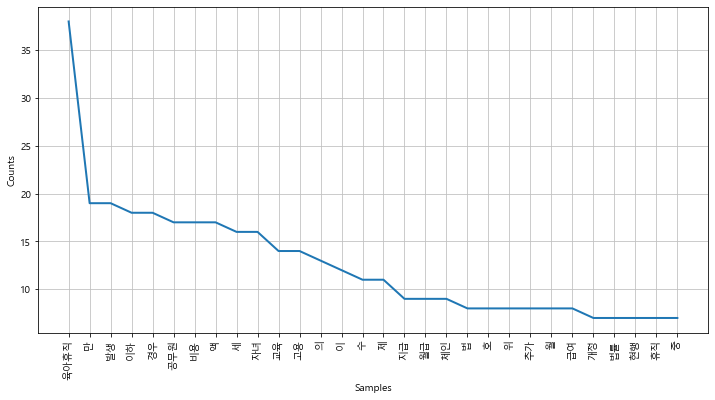

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path= 'c:/windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

font_name= font_manager.FontProperties(fname=path).get_name()
rc('font', family= font_name)

plt.figure(figsize=(12,6))
ko.plot(30)                 # 빈도수 상위30 개
plt.show()

In [58]:
from wordcloud import WordCloud, STOPWORDS

stopwords=['만','아하','액','세','의','이','수','제','법','호','위','월','중','안','및','로','생','략','것']
ko=[each_word for each_word in ko if each_word not in stopwords]
ko

['교육',
 '공무원',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '번',
 '발의',
 '연월일',
 '발',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '내용',
 '현행',
 '교육',
 '공무원',
 '육아휴직',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자',
 '녀',
 '육아',
 '경우',
 '한정',
 '초등학교',
 '취학',
 '후',
 '등하교',
 '방과',
 '후',
 '양육',
 '등',
 '어려움',
 '저학년',
 '자녀',
 '혼자',
 '등하교',
 '거나',
 '어른',
 '집',
 '성폭력',
 '범죄',
 '등',
 '흉악',
 '범죄',
 '피해자',
 '고',
 '육아휴직',
 '가능',
 '시기',
 '이하',
 '자녀',
 '확대',
 '자녀',
 '초등학교',
 '입학',
 '학교생활',
 '롭',
 '나이',
 '교육',
 '공무원',
 '자녀',
 '양육',
 '위해',
 '휴직',
 '것임',
 '항제',
 '법률',
 '교육',
 '공무원',
 '일부',
 '개정',
 '법률',
 '교육',
 '공무원',
 '일부',
 '다음',
 '개정',
 '항제',
 '자녀',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '를',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자',
 '녀',
 '항제',
 '이내',
 '다만',
 '여자',
 '교육',
 '공무원',
 '경',
 '범위',
 '내',
 '그',
 '연장',
 '를',
 '이내',
 '여자',
 '교육',
 '공무원',
 '이내',
 '분할',
 '휴직',
 '부',
 '칙',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비'

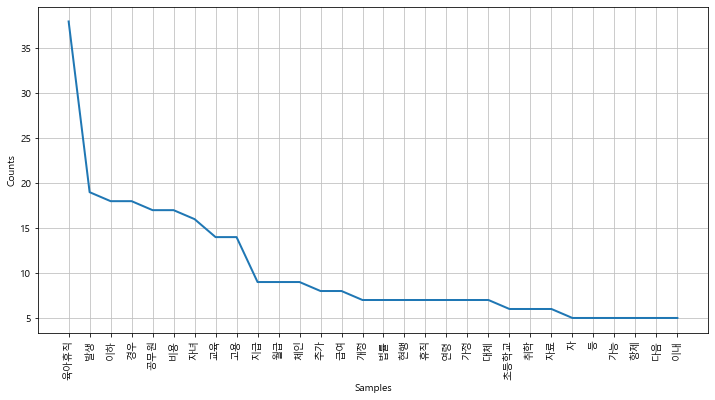

In [59]:
ko=nltk.Text(ko)

plt.figure(figsize=(12,6))
ko.plot(30)
plt.show()

시각화 

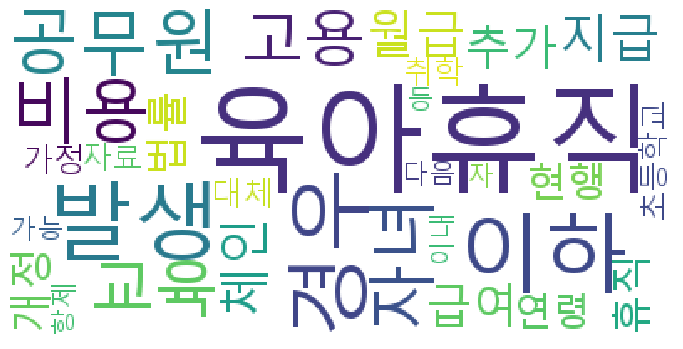

In [60]:
data=ko.vocab().most_common(30)   #최빈도 단어 30개를 사용

wordcloud=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(12,18))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 정규 표현식 연습 

# 2
다음 text에서 휴대포 번호와 전화번호를 모두 추출하는 정규식을 작성하고 리턴받아 보자
text: 제 휴대폰 번호는 010-1234-5678이고, 전화 번호는 0211335577입니다.

In [72]:
import re
text="제 휴대폰 번호는 010-1234-5678이고, 전화 번호는 0211335577입니다."

number=re.compile('\d{2,3}-?\d{4}-?\d{4,}')
number.findall(text)


['010-1234-5678', '0211335577']

# 3 
다음 text에서 휴대폰 번호와 전화 번호를 모두 추출하는 정규식을 작성하고 리턴받아 보자

text: 제 휴대폰 번호는 010-1234-5678이고, 전화 번호는 0211335577 와 02.1133.5599입니다

In [68]:
import re
text="제 휴대폰 번호는 010-1234-5678이고, 전화 번호는 0211335577 와 02.1133.5599입니다"

number=re.compile('\d{2,3}\D?\d{3,4}\D?\d{4,}')  #'\d{2,3}\W?\W{3,4}\W?\d{4,}'
number.findall(text)


['010-1234-5678', '0211335577', '02.1133.5599']

# 4
위 text에서 전화번호 블럭처리해서 리턴 받기

In [77]:
import re
text="제 휴대폰 번호는 010-1234-5678이고, 전화 번호는 0211335577 와 02.1133.5599입니다"


number=re.sub("\d+","***", text)  # number=re.sub('\d{2,3}\W?\d{4}\W?\d{4,}','xxx', text)

#number.findall(text)
print(number)

제 휴대폰 번호는 ***-***-***이고, 전화 번호는 *** 와 ***.***.***입니다
